## Player Statistics Correlation

First we need the necessary imports

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Open the .csv file and clear out anything but statistics

In [5]:
stats = pd.read_csv('/Users/michele/Desktop/NBA/NBA Player Stats v1.1.csv')
stats.drop(stats.columns[[0, 1]], axis=1, inplace=True)
stats.columns

Index(['G', 'GS', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'Salary'], dtype='object')

Create correlation matrix

<AxesSubplot:title={'center':'Correlation Player Statistics'}>

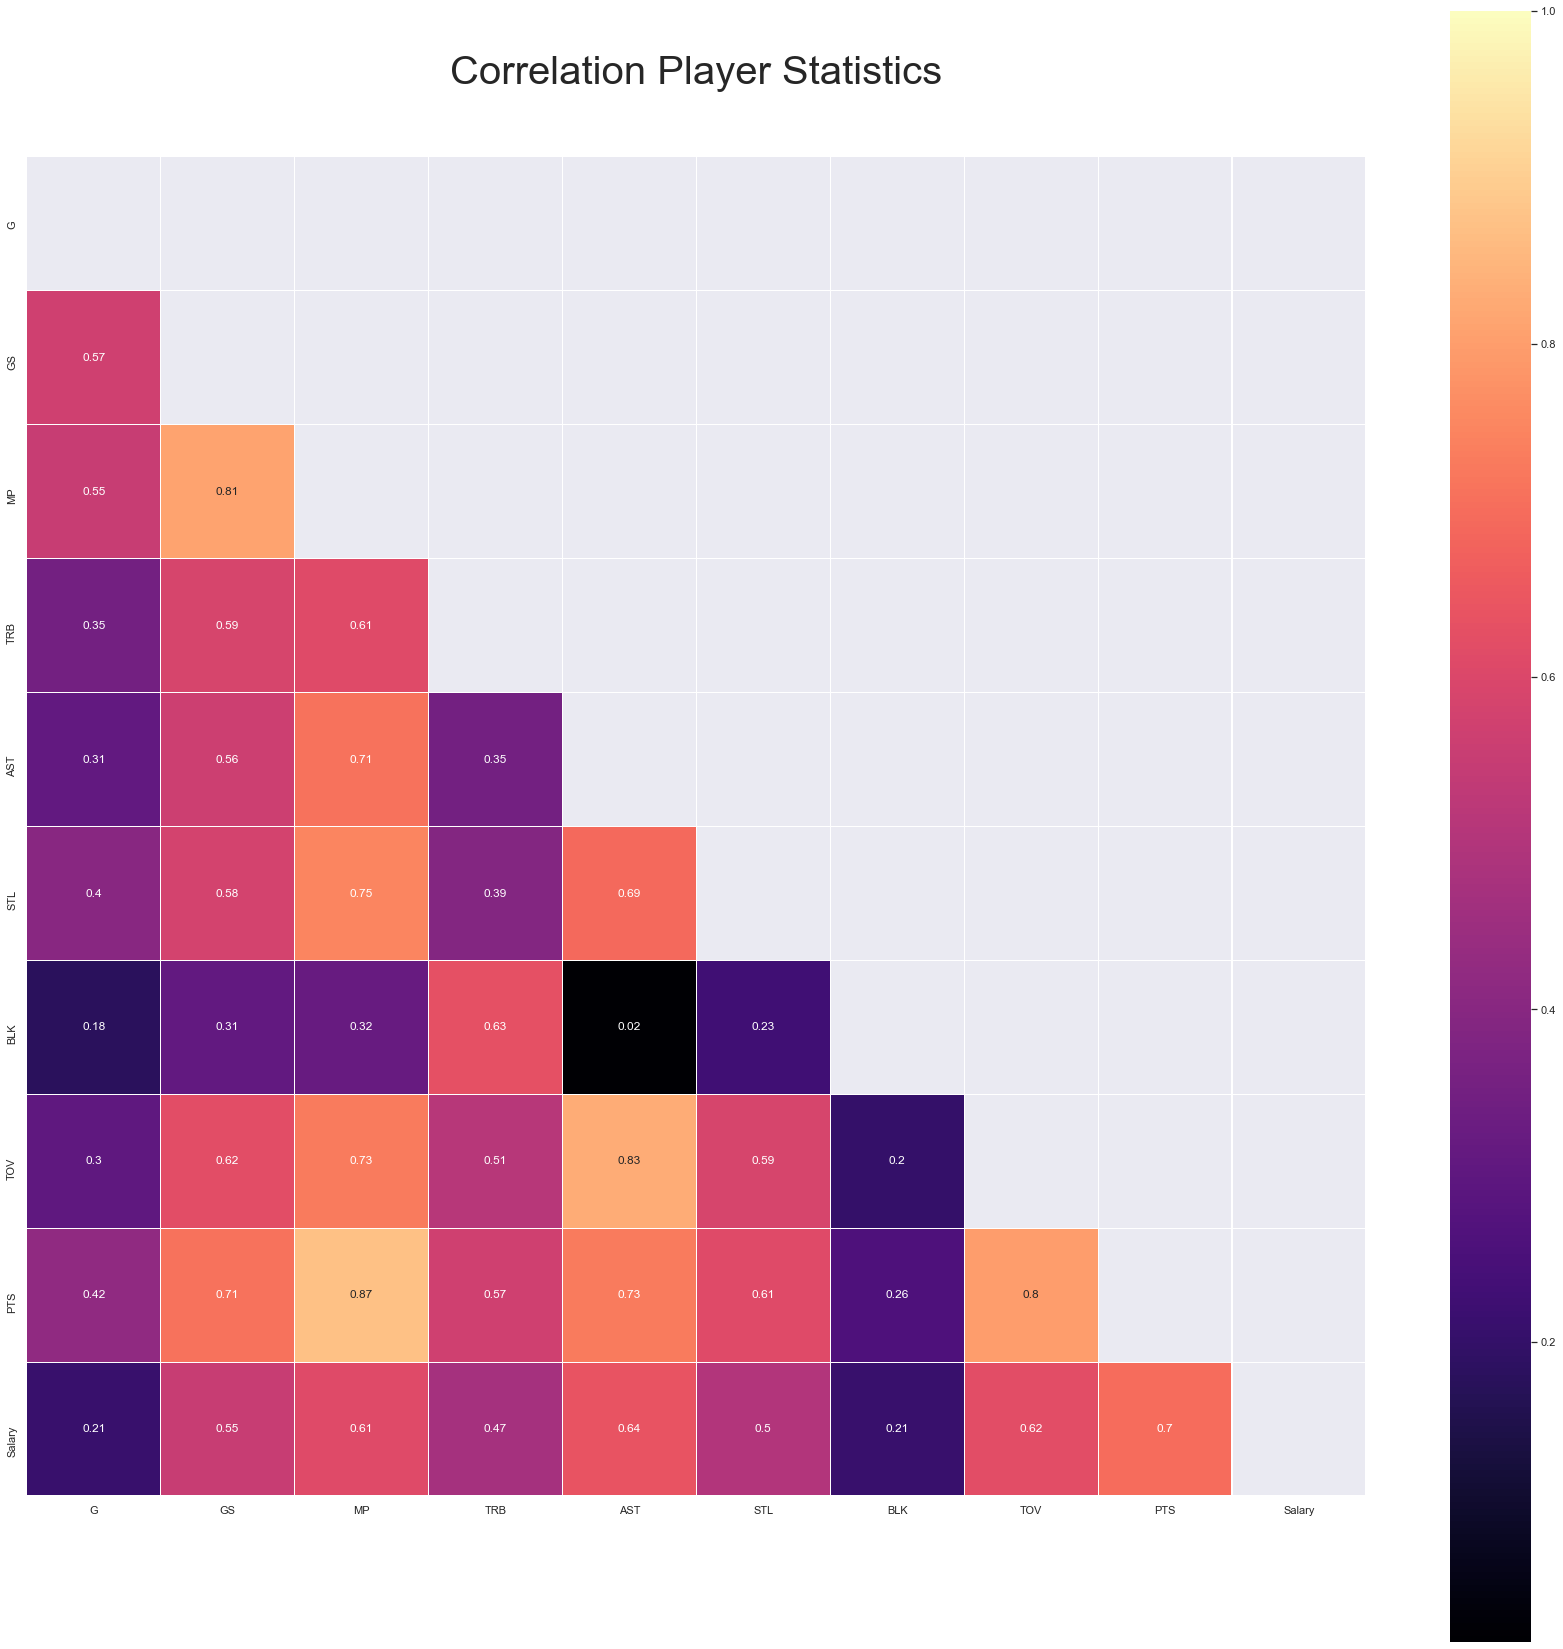

In [6]:
# set color palette and size of map
colormap = plt.cm.magma
sns.set(font_scale = 1)
plt.figure(figsize=(30, 30))

plt.title('Correlation Player Statistics', y = 1.05, size = 40)

corr = stats.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)